# Cài đặt & import thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Đọc dữ liệu từ file CSV

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic.csv


In [3]:
import pandas as pd

# Đổi tên này đúng theo tên bạn thấy sau khi upload (nếu khác)
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Encode các cột phân loại (trừ nhãn)

In [4]:
label_cols = df.select_dtypes(include='object').columns.tolist()
label_cols.remove('NObeyesdad')

encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le


# Encode nhãn đầu ra

In [5]:
target_le = LabelEncoder()
df['NObeyesdad'] = target_le.fit_transform(df['NObeyesdad'])

# Chia dữ liệu

In [6]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Chuẩn hóa

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train/test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình

In [9]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Dự đoán

In [10]:
y_pred = clf.predict(X_test)

# In báo cáo

In [11]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_le.classes_))

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.98      0.98        56
      Normal_Weight       0.90      0.90      0.90        62
     Obesity_Type_I       0.99      0.97      0.98        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.88      0.89      0.88        56
Overweight_Level_II       0.98      0.96      0.97        50

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



# Confusion Matrix

In [12]:
cm = confusion_matrix(y_test, y_pred)
labels = target_le.classes_

# Vẽ confusion matrix kiểu đẹp

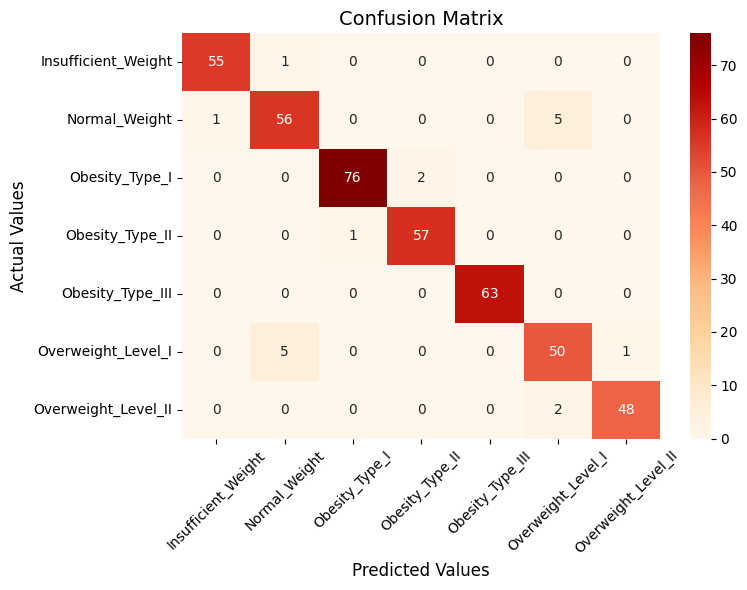

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='OrRd',
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Actual Values", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()